# HOW TO RETRIEVE AND USE VOLCANO DATA

# Aggregating data

[GeoNet's Tilde API (Application Program Interface)](https://tilde.geonet.org.nz/v4/api-docs/) provides a data aggregation function, to calculate, for example, the daily mean value of a data stream. For volcano data, this functionality is applicable only for `envirosensor` and `scanDOAS` data domains. The `manualcollect` domain's data collection rate is too low to gain any value from the aggregation that is available.

For additional information on how to use Tilde with volcano data please refer to the [Supplementary notes](https://www.geonet.org.nz/data/supplementary/volcano_tilde_notes)

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data aggregation - using envirosensor lake temperature data

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#for querying data
import requests
import json

#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for getting CSV format data
from io import StringIO

#for system functions
import os

### Set the source URL

Using [API data endpoint](https://tilde.geonet.org.nz/v4/api-docs/endpoint/data)

In [2]:
#API version 4 data endpoint
source = 'https://tilde.geonet.org.nz/v4/data/'

## &nbsp;2. Data aggregation
## Using envirosensor lake temperature data

### No aggregation

We request data on the water temperature from the lake in Inferno Crater.

For all envirosensor data:
- domain = `envirosensor`

The specific parameters are:
  - station = `OT001`, the station code for Inferno Crater
  - name (type of data) = `lake-temperature`
  - sensorcode = `01`, code for the specific sensor number
  - method (of data collection) = `snapshot`
  - aspect = `-`, not set as not relevant for this query

The resulting `key` specifies the data stream:
  - `OT001/lake-temperature/01/snapshot/-`

Date range:
  - startdate = `2024-02-01`
  - enddate = `2024-05-31`

Complete request
- `envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31`

In [3]:
url = source+'envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31'

We will now query the URL and ask for a CSV format to be returned. A 200 response code indicates everything went okay, and the result has been returned (if any).

In [4]:
r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

<Response [200]>


To work with the observation data we will use python's [pandas module](https://pandas.pydata.org/). We will store the response of our request in a pandas dataframe (`df`), using `pd.read_csv`. By using `parse_dates=['timestamp']` we can convert the 'timestamp' column to a datetime, which makes it easier to work with the data. We add `date_format='ISO8601'` to ensure that pandas uses the full `ISO 8601` datetime format we record our data in. Using `index_col`, we can set the date and time as the index of the dataframe. More information on `pd.read_csv` can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html. We need to use the `StringIO` function with the text returned from our query. By printing the beginning of the result, with `df.head()`, we can see the first 5 lines of the dataframe from our query.

Once we have the data in the dataframe, we can begin our analysis.

In [5]:
df = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
df.head()

,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.83603,degC,0.0,degC,NaN
2024-02-01 00:10:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.86779,degC,0.0,degC,NaN
2024-02-01 00:20:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.75852,degC,0.0,degC,NaN
2024-02-01 00:30:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.62638,degC,0.0,degC,NaN
2024-02-01 00:40:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,60.55436,degC,0.0,degC,NaN


### Basic Data Plot
By using the value column from our dataframe we are able to produce a basic graph of lake temperature against time.

Text(0, 0.5, 'water temperature ($^o$C)')

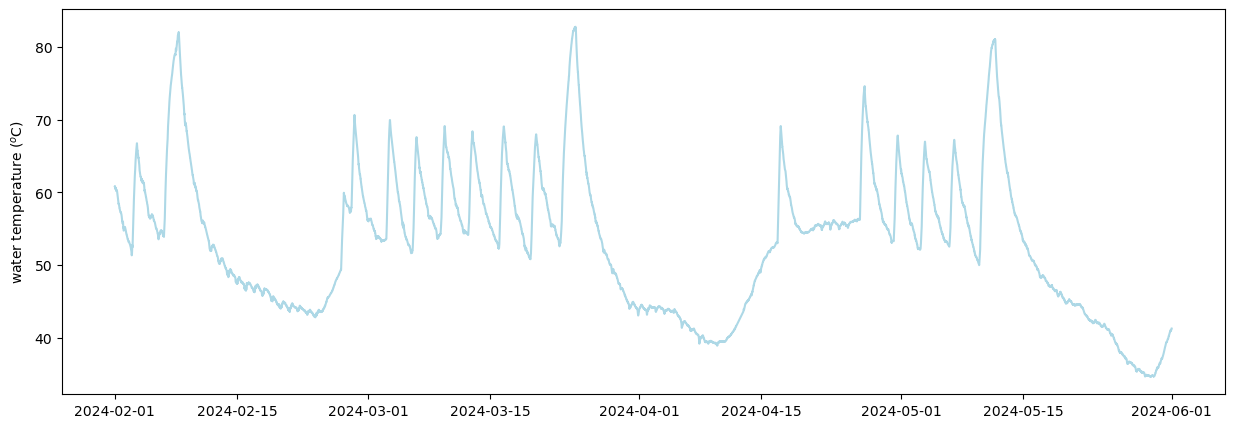

In [6]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='lightblue')
ax.set_ylabel('water temperature ($^o$C)')

### Using an aggregation function

We add an aggregation option, in this case the daily mean value, to the request. The longest available aggregation period is one day (1d). Due to the aggregation, our dataframe's index column has time values `00:00:00`.

The specific parameters are:

- aggregationPeriod = `1d`, aggregate over one day; available aggregation periods are 1m, 5m, 10m, 15m, 1h, 2h, 3h, 4h, 6h, 8h, 1h, 1d
- aggregationFunction = `mean`, available functions are min, max, mean, sum, Perc(N) 

Complete request
- `envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31?aggregationPeriod=1d&aggregationFunction=mean`

In [7]:
url = source+'envirosensor/OT001/lake-temperature/01/snapshot/-/2024-02-01/2024-05-31\
?aggregationPeriod=1d&aggregationFunction=mean'

r = requests.get(url, headers={'Accept':'text/csv'})
print (r)

agg = pd.read_csv(StringIO(r.text),parse_dates=['timestamp'], date_format='ISO8601', index_col='timestamp')
agg.head()

<Response [200]>


,domain,station,name,sensorCode,method,aspect,value,valueUnit,error,errorUnit,qualityControl
timestamp,,,,,,,,,,,
2024-02-01 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,58.232744,degC,0.0,degC,NaN
2024-02-02 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,53.586942,degC,0.0,degC,NaN
2024-02-03 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,62.251406,degC,0.0,degC,NaN
2024-02-04 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,59.570001,degC,0.0,degC,NaN
2024-02-05 00:00:00+00:00,envirosensor,OT001,lake-temperature,1,snapshot,nil,55.801934,degC,0.0,degC,NaN


#### Basic Data Plot
Because we have only one value per day, the graph is coarser than the graph with all the data. Peaks and troughs are not well represented by the aggregated data.

By default, aggregated values are given at the time of the start of the aggregation interval, in this case `00:00:00`. Thus, the aggregated values do not plot in the optimal location on a graph showing all data.

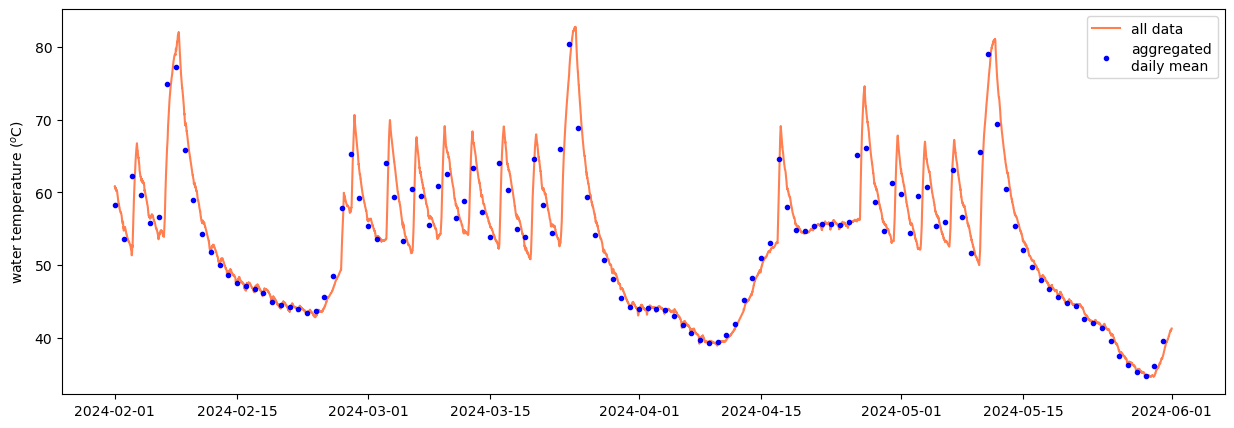

In [8]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='coral', label='all data')
ax.plot(agg.index, agg['value'], color='blue', marker='.', linestyle='None', label='aggregated\ndaily mean')   
ax.set_ylabel('water temperature ($^o$C)')
ax.legend(loc='upper right')

#### Modifying the time
Add 12 hours to the datetime index so the aggregated values sit in the middle of the period they represeent, and plot in a better location on a graph showing all data, though peaks and troughs are still not well represented.

In [9]:
agg.index = agg.index + pd.DateOffset(hours=12)

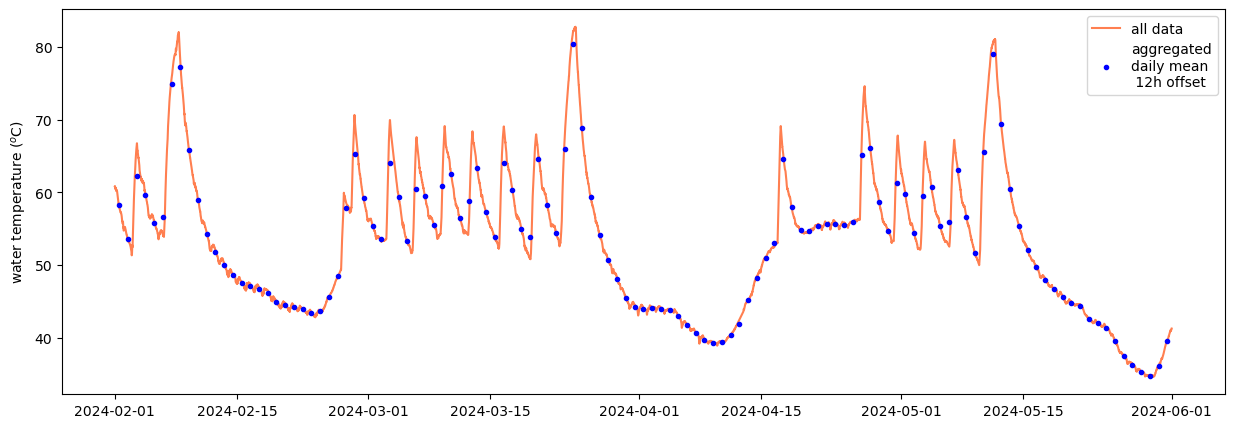

In [10]:
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(df.index, df['value'], color='coral', label='all data')
ax.plot(agg.index, agg['value'], color='blue', marker='.', linestyle='None', label='aggregated\ndaily mean\n 12h offset')   
ax.set_ylabel('water temperature ($^o$C)')
ax.legend(loc='upper right')